In [46]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

### Izikhevich Neuron Model

This notebook will compare the Izikhevich neuron model for single and groups of neurons implemented in matlab/python compared to using Nengo, a python package for building/testing/deploying neural networks, and nengo Loihi, a backend for running Nengo models on Intel’s Loihi architecture

Model single neuron initially: normally vs. nengo
then small number of neurons with adjacency matrix: normal v nengo


* Track v, u, (and I as well?) for different parameters of model
* firing rate
* Deterministic input versus noise for I



In [78]:
########################################################################
# SINGLE NEURON - non-nengo version
#######################################################################

# parameters
# changing a, b, c, and d results in various intrinsic firing patterns
# that can be computed, so we put them in an array to be easily changed
# params = [a, b, c, d]

params = [ 0.02, 0.20, -65, 6]

a = params[0]
b = params[1]
c = params[2]
d = params[3]
# I = 80             # current injection, causes voltage response

c1 = 0.04
c2 = 0.05
c3 = 140


# set up time 
N = 5000                     # total number of points desired
tMax = 100                   # max time (ms)
t = np.linspace(0, tMax, N)  # Nx1 array with timepoints
dt = t[1] - t[0]             # one time step


# set up membrane potential (v) and recovery variable (u) arrays:
v = np.zeros((N, 1))
u = np.zeros((N, 1))
vM = np.zeros((N ,1))    # used to visualize spikes (think about this)
# Iext = np.zeros((N, 1))
Iext = np.random.randn(N, 1) # use this for noisy input
# Iext[int(N/10):] = I         # after a tenth of the total time, increase current (piecewise)

# initialize
v[0] = -65
u[0] = b * v[0]

for i in range(0, N-1):
    # update membrane potential
    v[i+1] = v[i] + dt * (c1 * v[i]**2 + c2 * v[i] + c3 - u[i] + Iext[i])
    u[i+1] = u[i] + dt * a * (b * v[i] - u[i])

    
    # if neuron reaches threshold, apply after-spike setting
    if v[i+1] > 30:
        v[i+1] = c
        u[i+1] += d
        # vM[i+1] = 30
    else:
        vM[i+1] = v[i+1]
        

Text(0.5, 0, 'time(ms)')

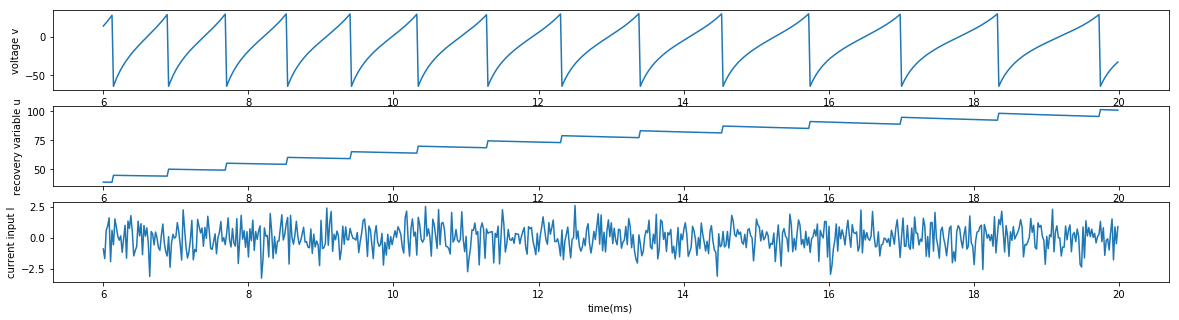

In [83]:
plt.figure(figsize = (20,5))

plt.subplot(311)
plt.plot(t[300:1000], v[300:1000])
plt.ylabel("voltage v")


plt.subplot(312)
plt.plot(t[300:1000], u[300:1000])
plt.ylabel("recovery variable u")
plt.xlabel("time(ms)")

plt.subplot(313)
plt.plot(t[300:1000], Iext[300:1000])
plt.ylabel("current input I")
plt.xlabel("time(ms)")



notes: compare diff parameter values, re-code as function so it's easier to test diff parameters, noisy and deterministic input

Now, using Nengo